In [2]:
from Prices import get_df
from options_strategy import Option, OptionsStrategy
from Montecarlo import OptionsMC

# Getting DATA

In [3]:
df = get_df('IDBTVER', start="13/02/2020")

# Montecarlo

In [4]:
series = df['Close']
series

Date
2020-02-13    1442.69
2020-02-14    1447.54
2020-02-18    1448.25
2020-02-19    1450.23
2020-02-20    1450.39
               ...   
2022-05-23    1354.51
2022-05-24    1361.53
2022-05-25    1362.97
2022-05-26    1365.56
2022-05-27    1370.89
Name: Close, Length: 574, dtype: float64

# Strategy

<AxesSubplot:>

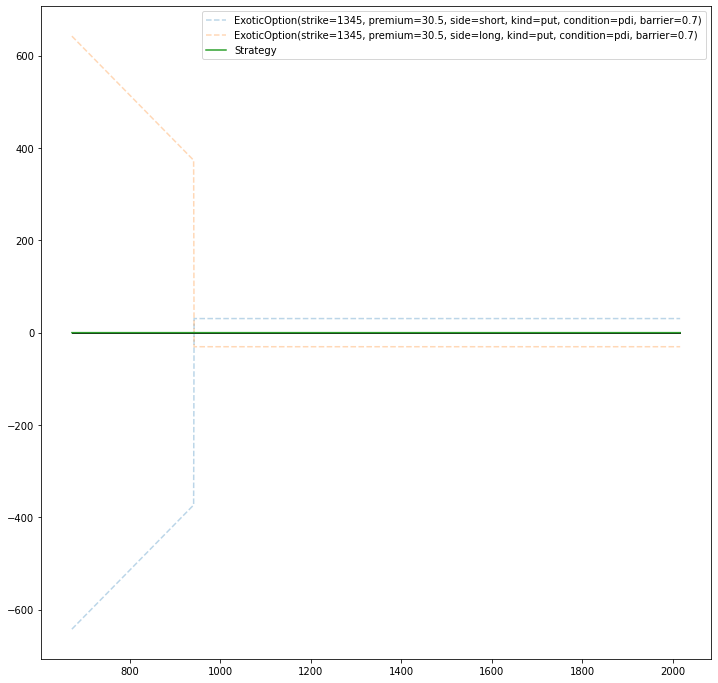

In [25]:
strategy.clear()
strategy = (OptionsStrategy()
            .add(strike=1345, premium=30.5, side="short", kind="put", condition="down and in", barrier=70/100)
            .add(strike=1345, premium=30.5, side="long", kind="put", condition="down and in", barrier=70/100)
            )
strategy.plot()

<AxesSubplot:>

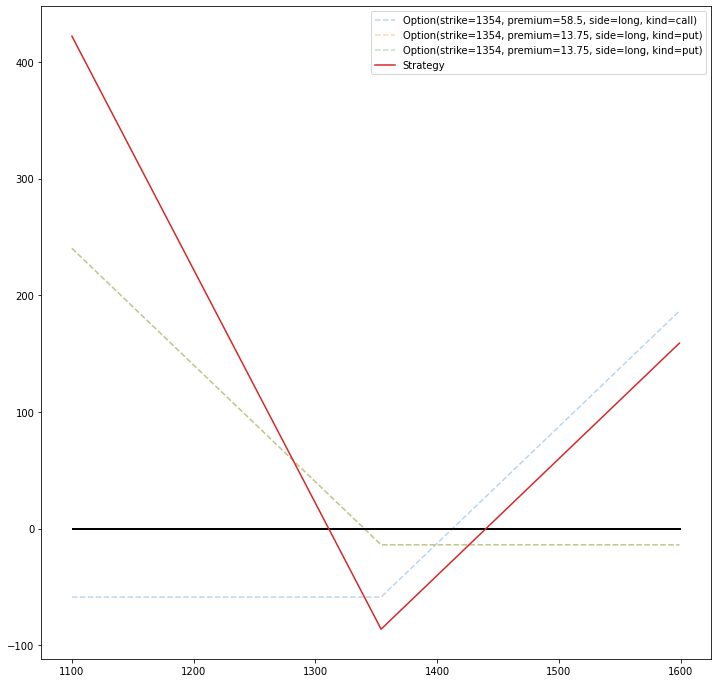

In [25]:
strategy = (OptionsStrategy().add(strike=1354, premium=58.5, side="long", kind="call")
            .add(strike=1354, premium=13.75, side="long", kind="put")
            .add(strike=1354, premium=13.75, side="long", kind="put"))
strategy.plot(1100, 1600)

# Markdown

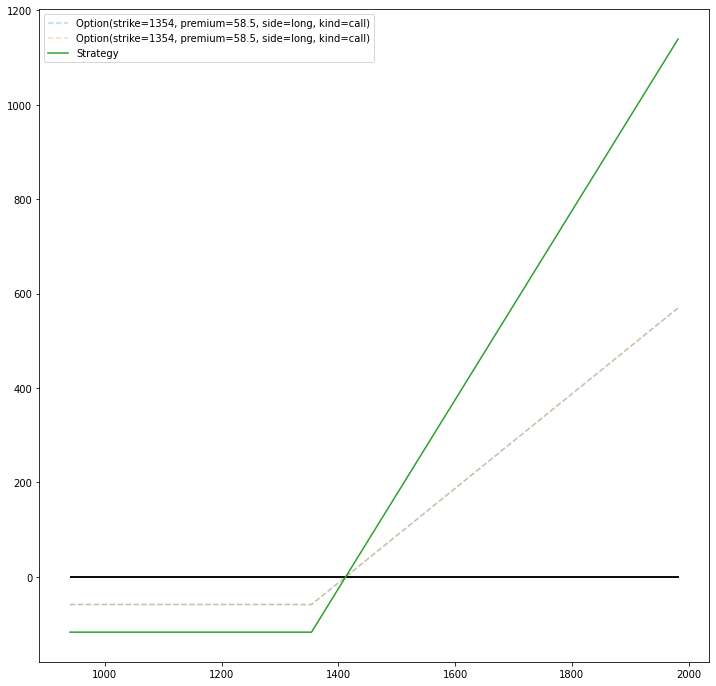

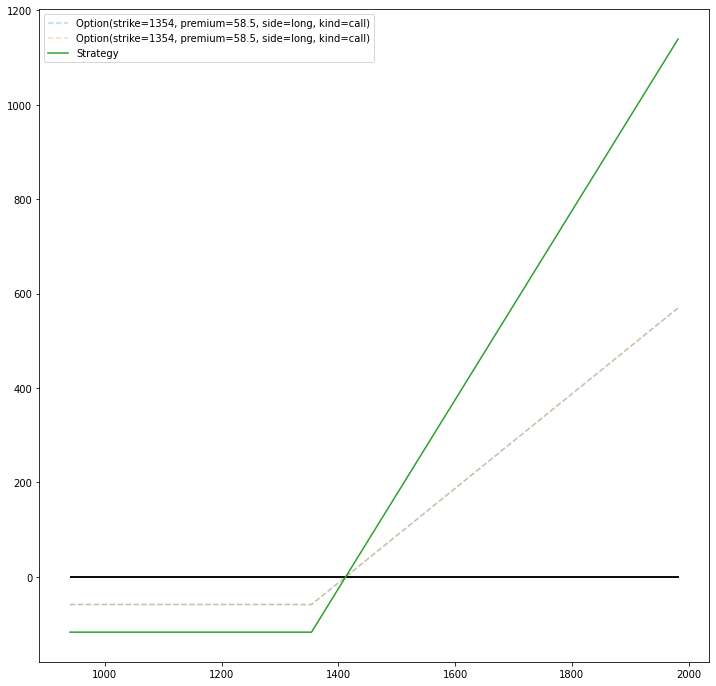

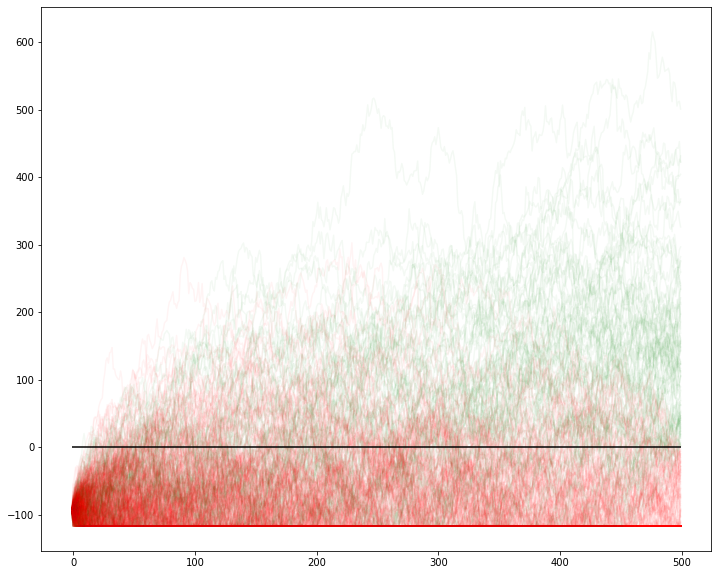

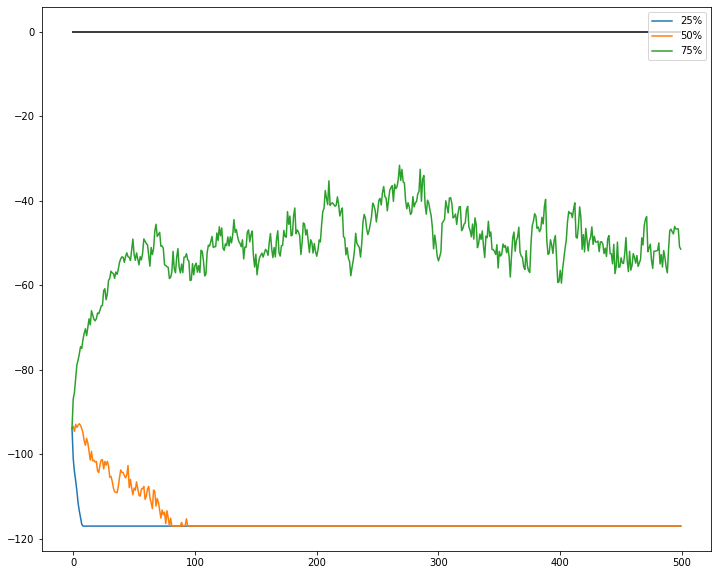

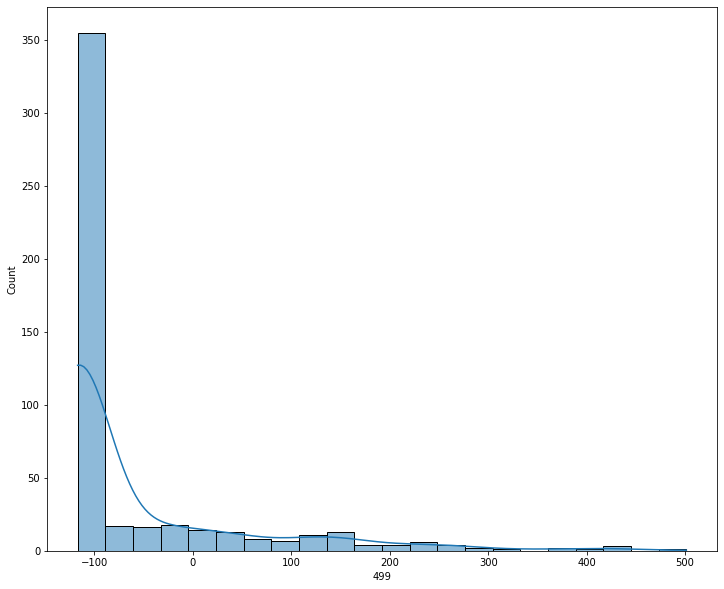

In [26]:
mc = OptionsMC(series, n_sims = 500)
(mc.add(strike=1354, premium=58.5, side="long", kind="call")
 .add(strike=1354, premium=58.5, side="long", kind="call"))
mc.display()

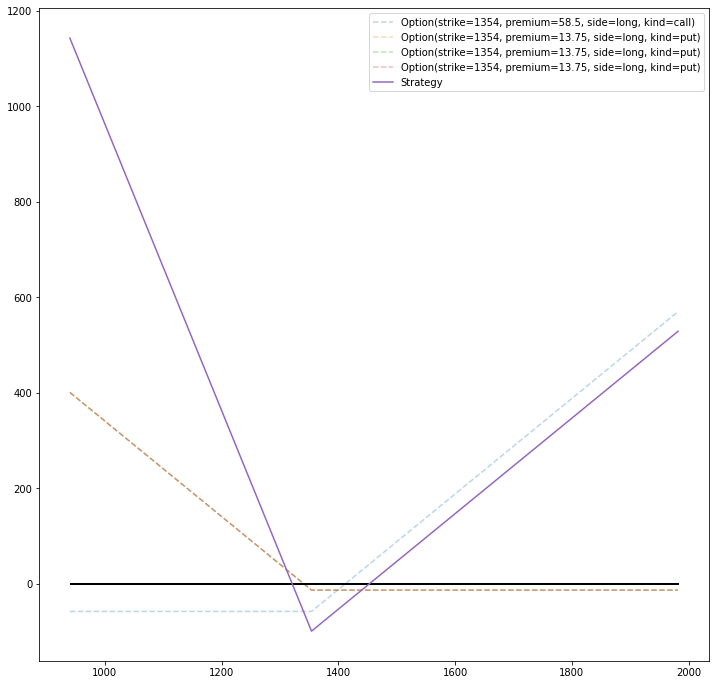

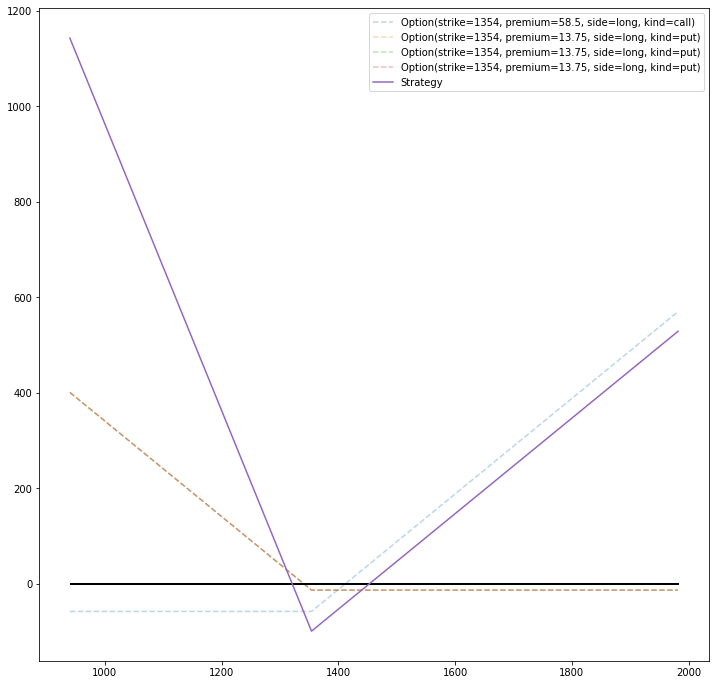

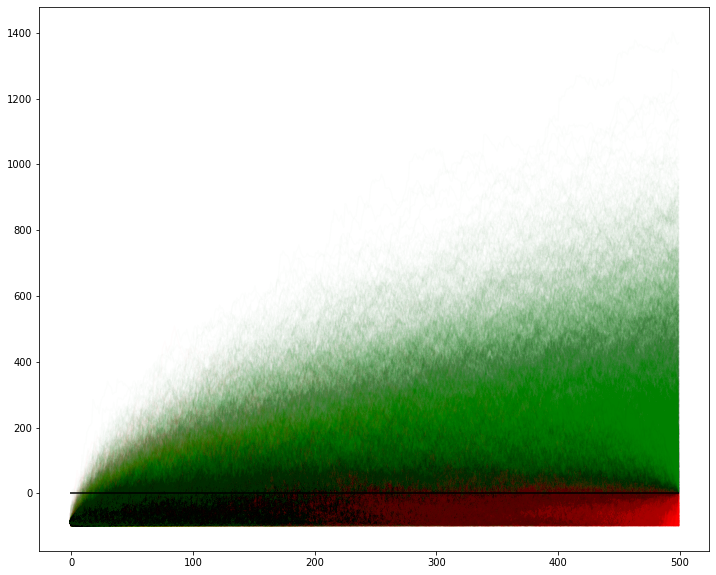

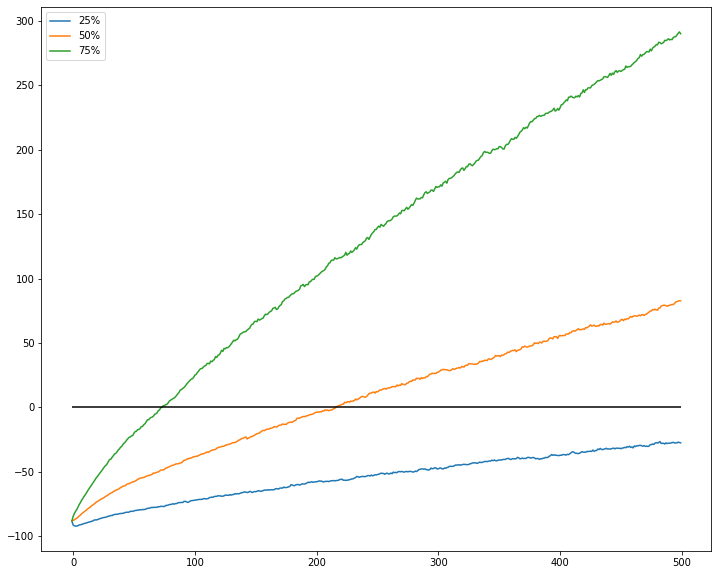

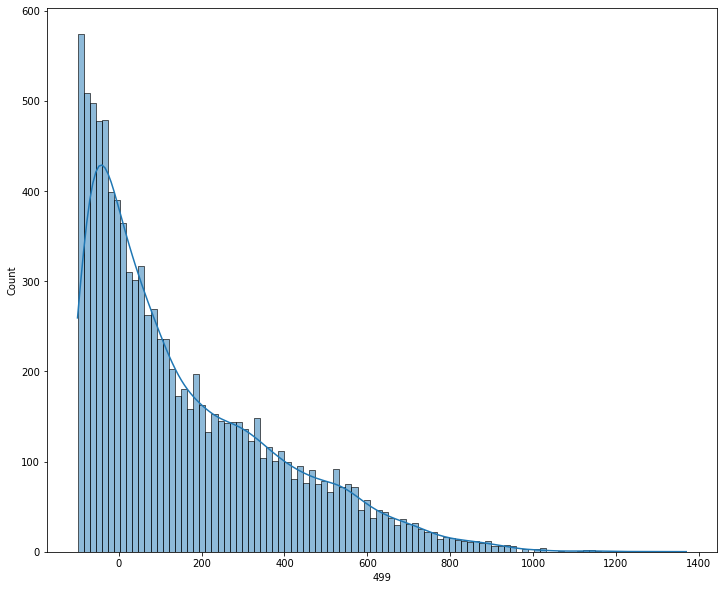

In [27]:
mc = OptionsMC(series, n_sims=10_000)
(mc.add(strike=1354, premium=58.5, side="long", kind="call")
 .add(strike=1354, premium=13.75, side="long", kind="put")
 .add(strike=1354, premium=13.75, side="long", kind="put")
.add(strike=1354, premium=13.75, side="long", kind="put")
 )
mc.plot_strategy()
mc.display()

# Auto Pricing Strategy

In [1]:
from options_strategy import BSOptionsStrategy

In [2]:
strategy = BSOptionsStrategy("IDBTVER", days=365*2)
strategy.b_and_s.last_price, strategy.b_and_s.volatility

(1370.89, 0.1261928564850908)

# Barrier Worst Of Barrier Reverse

0.034907035533828304


<AxesSubplot:>

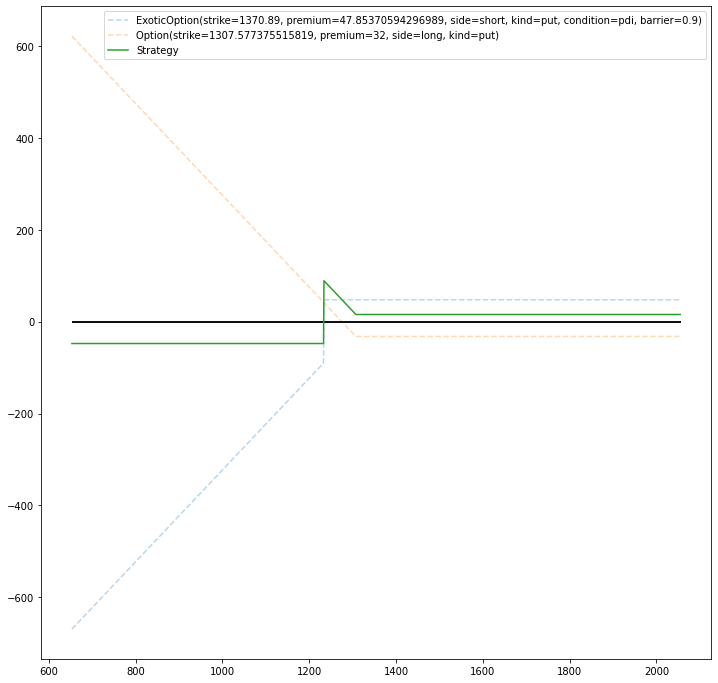

In [3]:
strategy.clear()
(strategy.add(side="short", kind="put", condition="down and in", barrier=90/100)
        .add(premium=32, side="long", kind="put")
)

strategy.plot()

# Exotic Straddle away and in

0.06734345650673546
0.027843625905394936
0.03247937688389989
0.05007366189593913


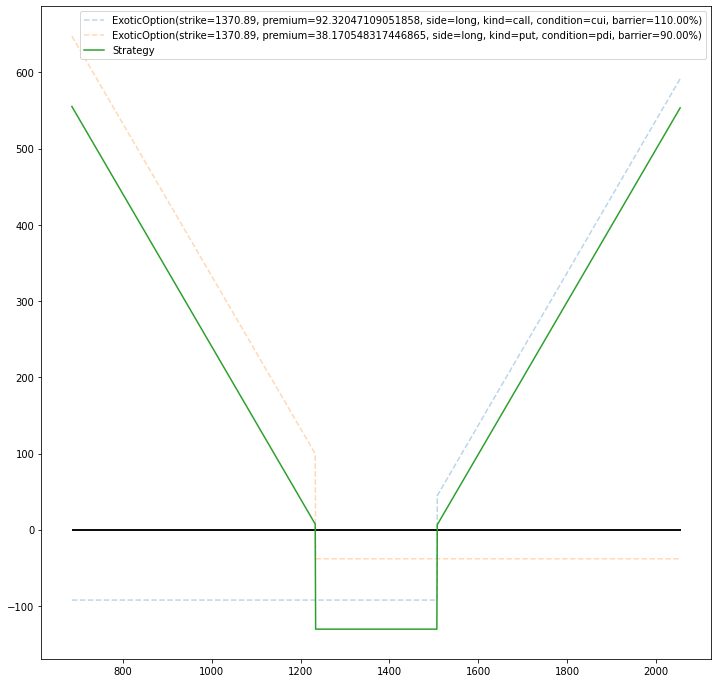

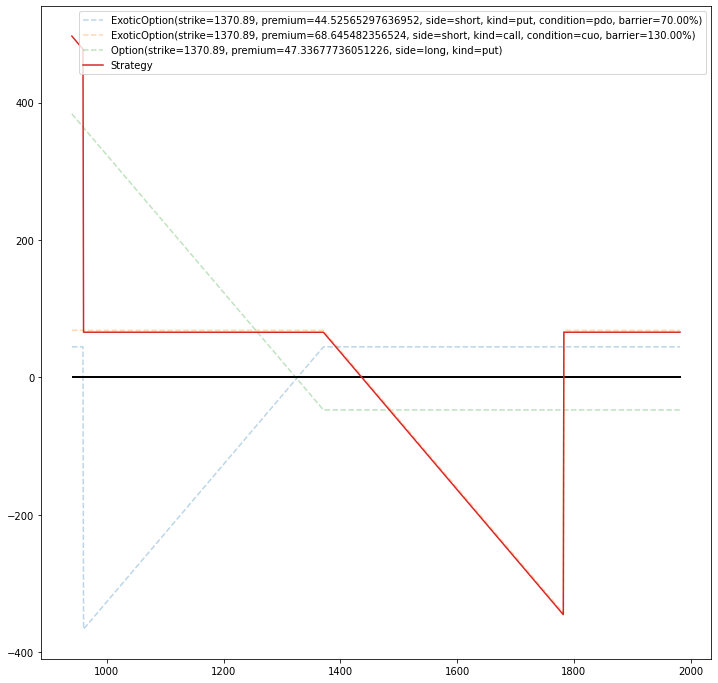

In [59]:
strategy.clear()
(strategy.add(side="long", kind="call", condition="up and in", barrier=110/100)
        .add(side="long", kind="put", condition="down and in", barrier=90/100)
)

strategy.plot()

mc.clear()
(mc.add(side="short", kind="put", condition="down and out", barrier=70/100)
 .add(side="short", kind="call", condition="up and out", barrier=130/100)
 .add(side="long", kind="put")

)
mc.plot_strategy()

# Auto Pricing Montecarlo

0.031065167923970696
0.0418608754762288


<AxesSubplot:>

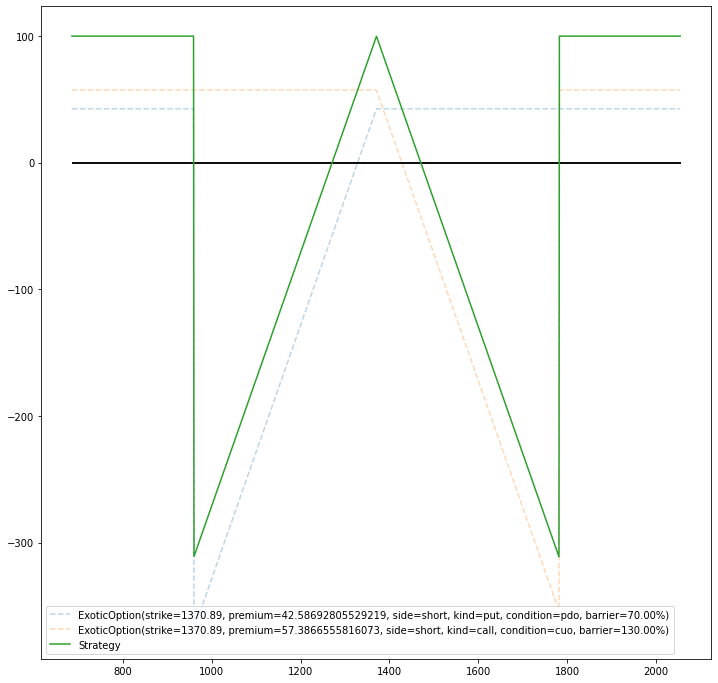

In [51]:
# long put down & in, long call up & in, short call plain vanilla 
strategy.clear()
(strategy.add(side="short", kind="put", condition="down and out", barrier=70/100)
        .add(side="short", kind="call", condition="up and out", barrier=130/100)
)

strategy.plot()




In [ ]:

sides = ["short", "long"]
kinds = ["put", "call"]
conditions = ["vanilla", "down and out", "up and out", "down and in", "up and in"]
barriers = [i/100 for i in range(70, 140, 10)]
combinations = [1, 2, 3, 4]
{
    "side":sides,
    "kind":kinds,
    "condition":conditions,
    "barrier":barriers,
}


In [39]:
from Montecarlo import BSOptionsMC

In [40]:
mc = BSOptionsMC("IDBTVER", n_sims=1000)

0.03777664728036364


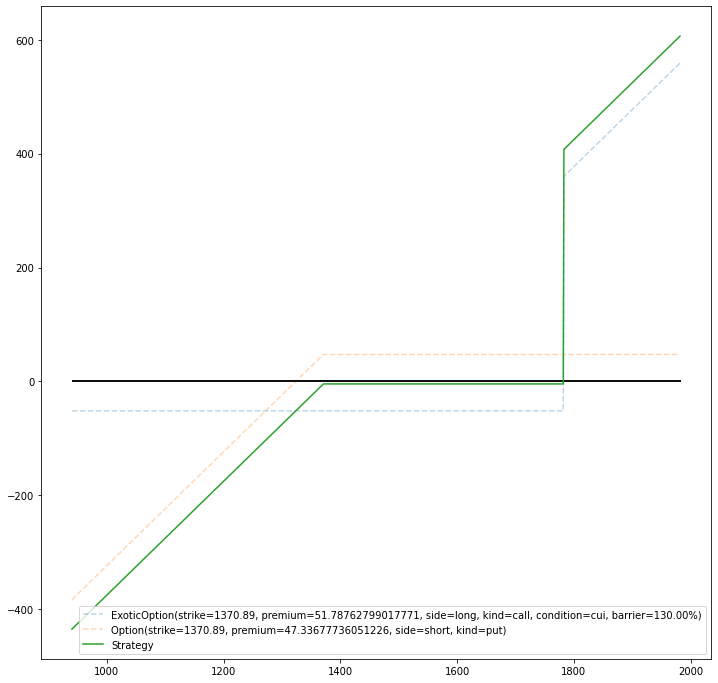

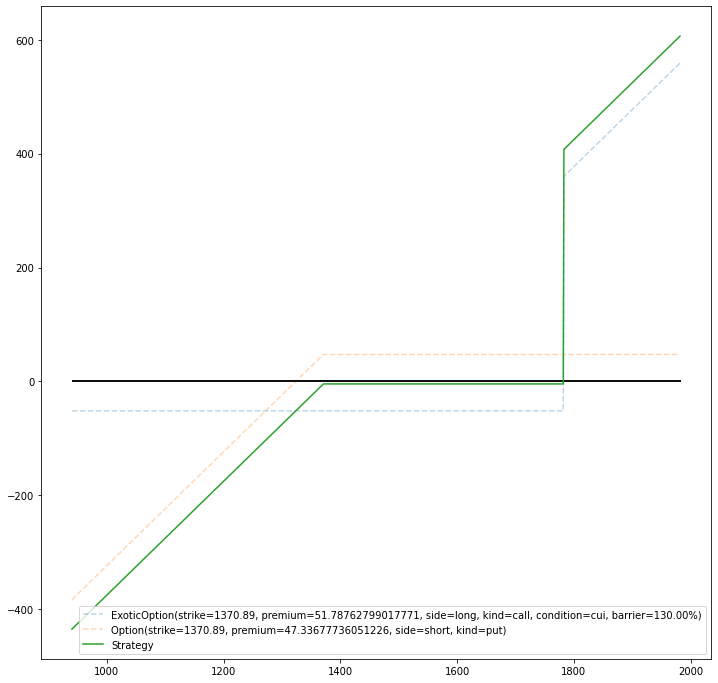

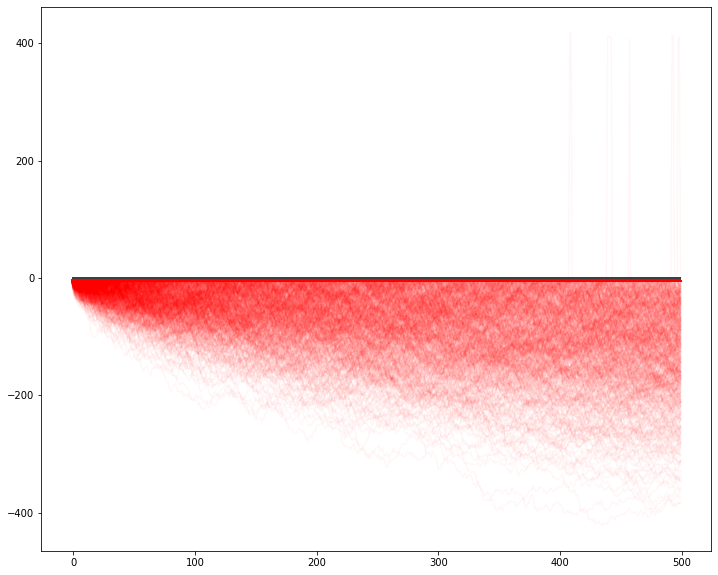

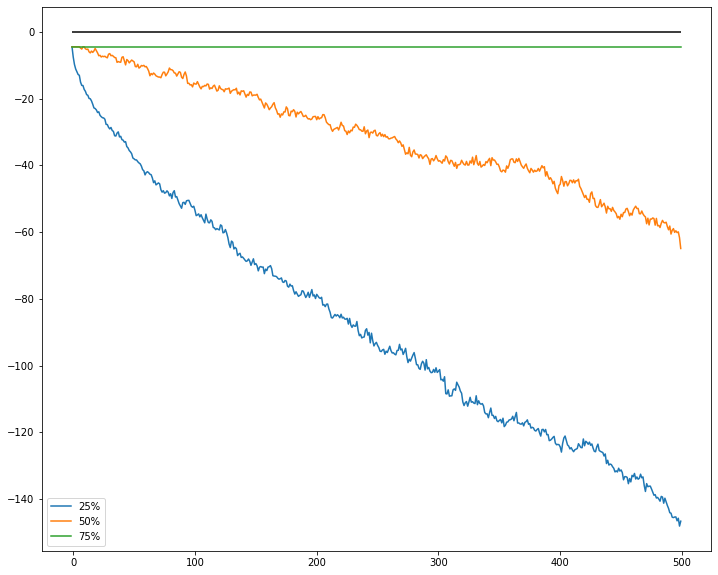

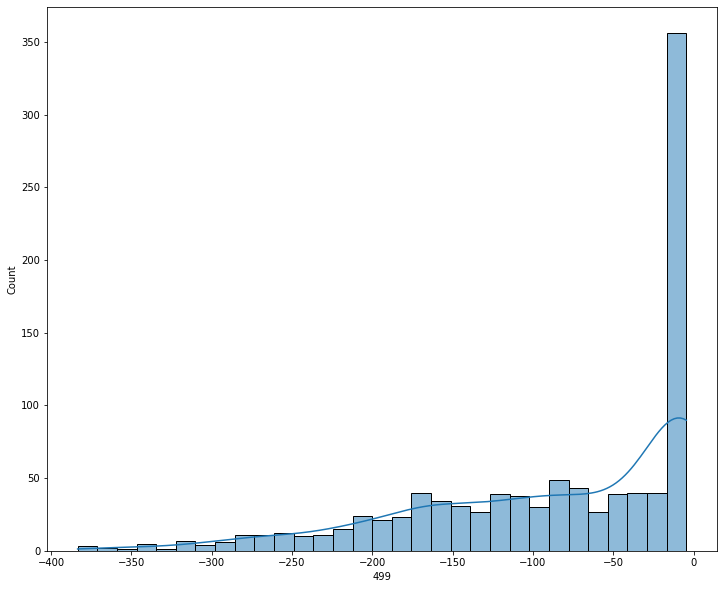

In [70]:
mc.clear()
(mc.add(side="long", kind="call",condition="up and in",barrier=130/100)
 .add(side="short", kind="put")

)
mc.plot_strategy()
mc.display()

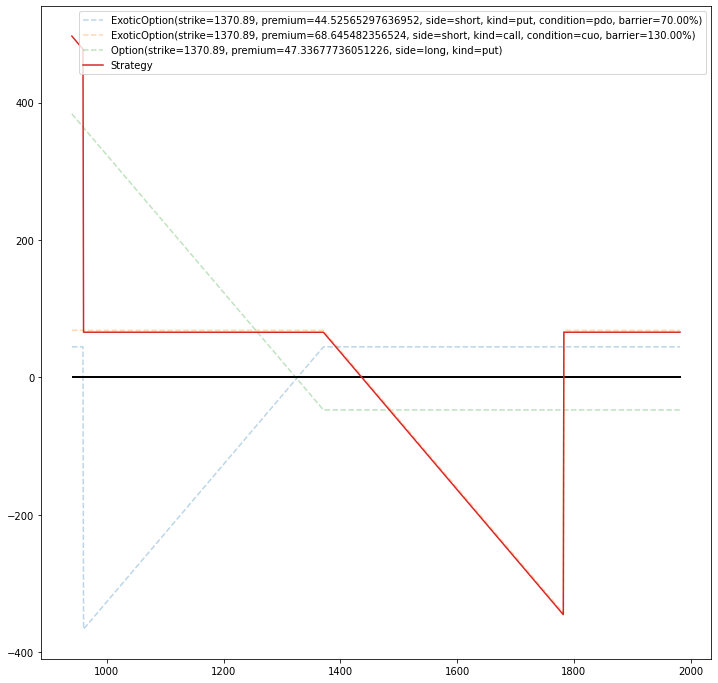

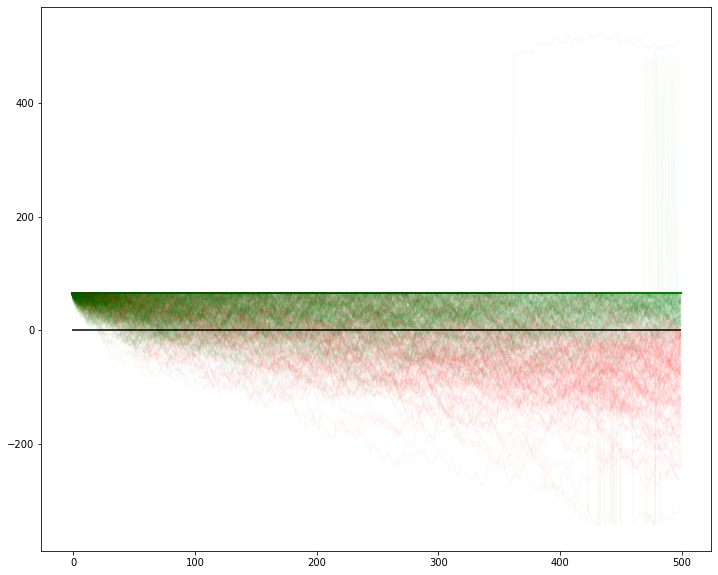

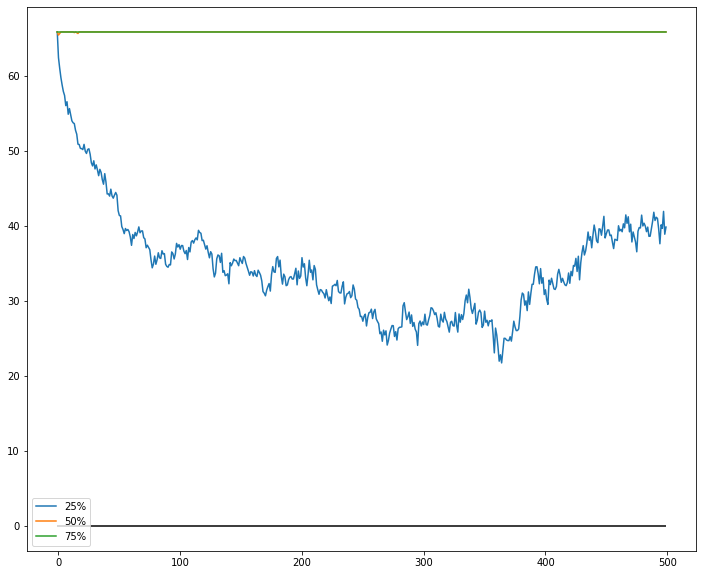

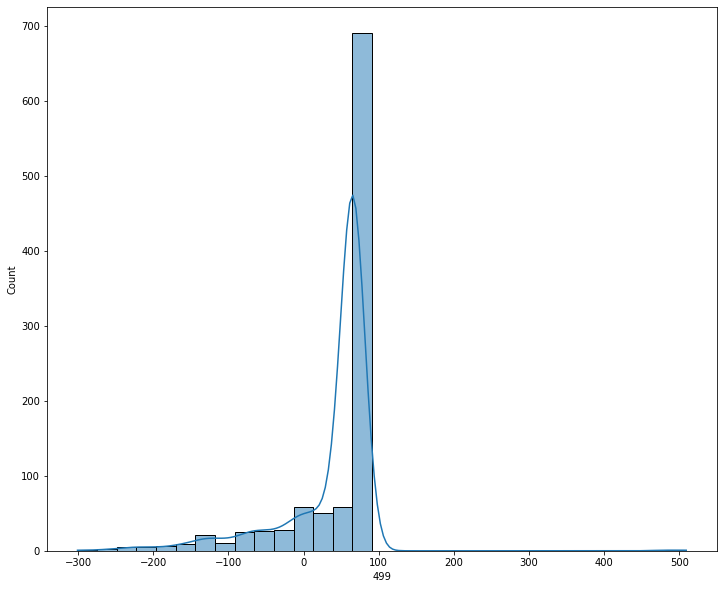

In [61]:
mc.display()

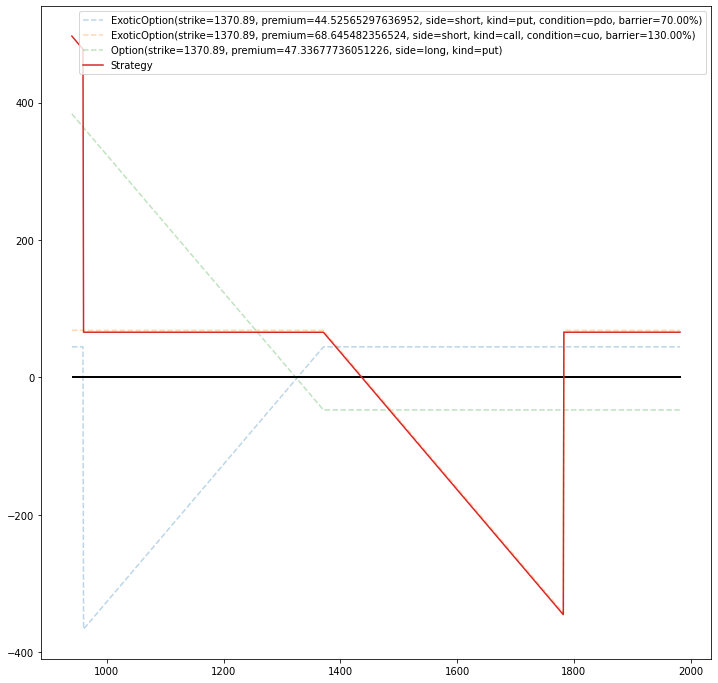

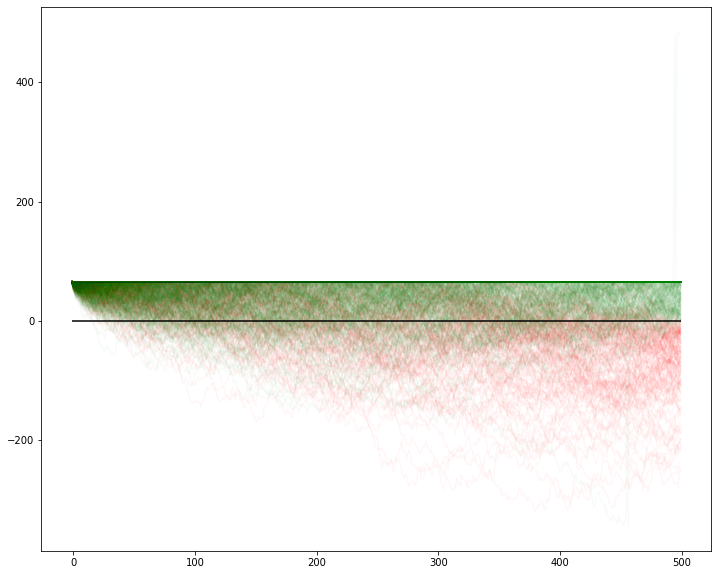

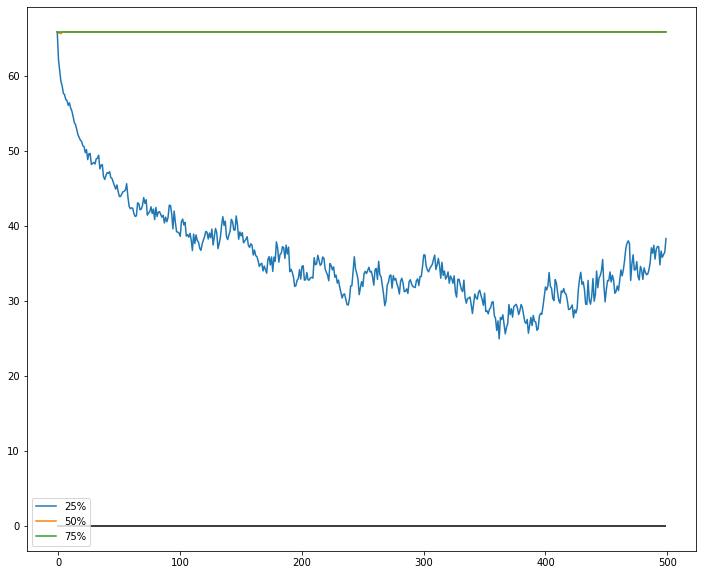

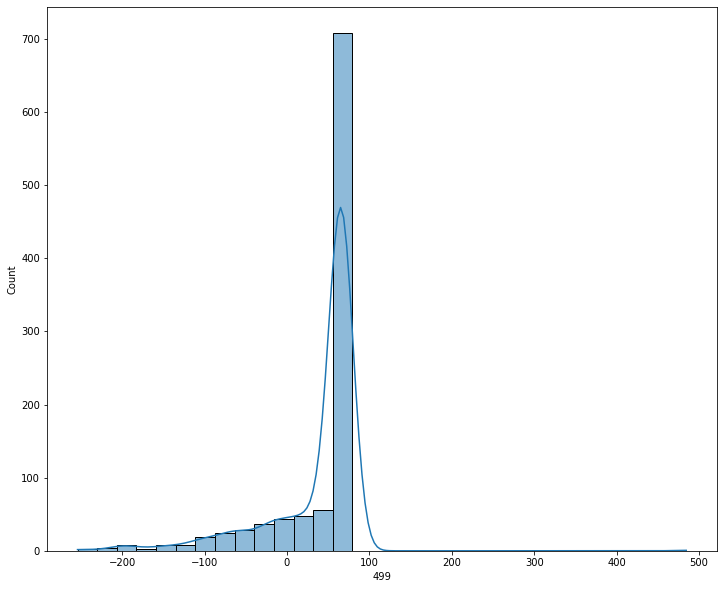

In [63]:
mc.display()

# Fun
### Call Spread

In [58]:
strategy = BSOptionsStrategy("IDBTVER")
strategy.b_and_s.last_price

1370.89

<AxesSubplot:>

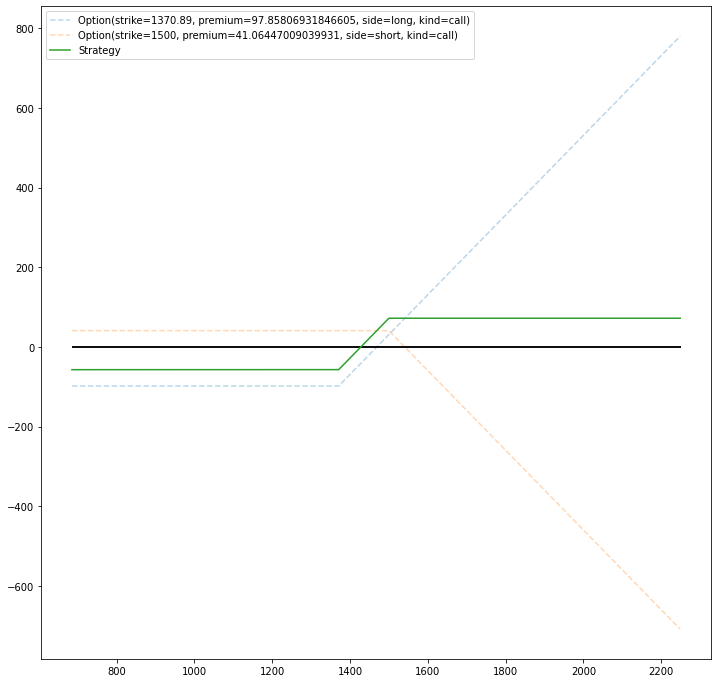

In [80]:
strategy.clear()
(strategy.add(kind="call")
        .add(strike=1500, kind="call", side="short"))

strategy.plot()

# Grid Search

In [1]:
from Montecarlo import GridSearch

In [2]:
cv = GridSearch("IDBTVER")

In [3]:
cv.search()

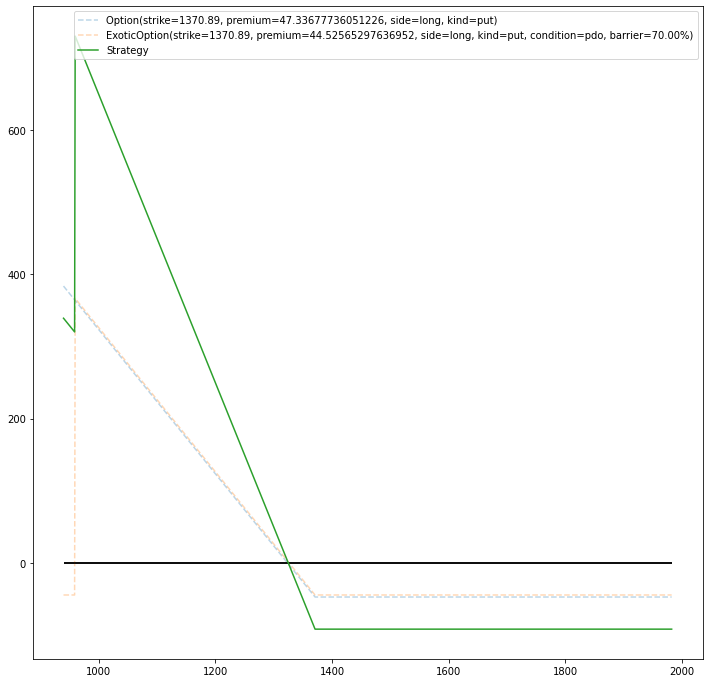

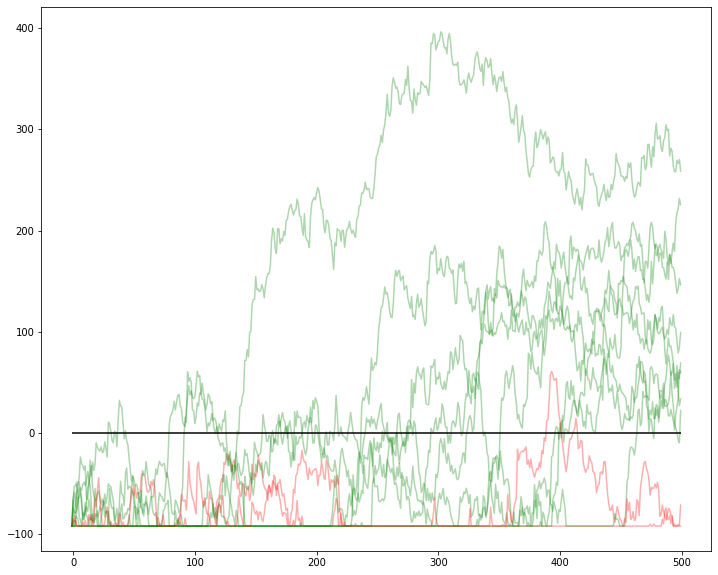

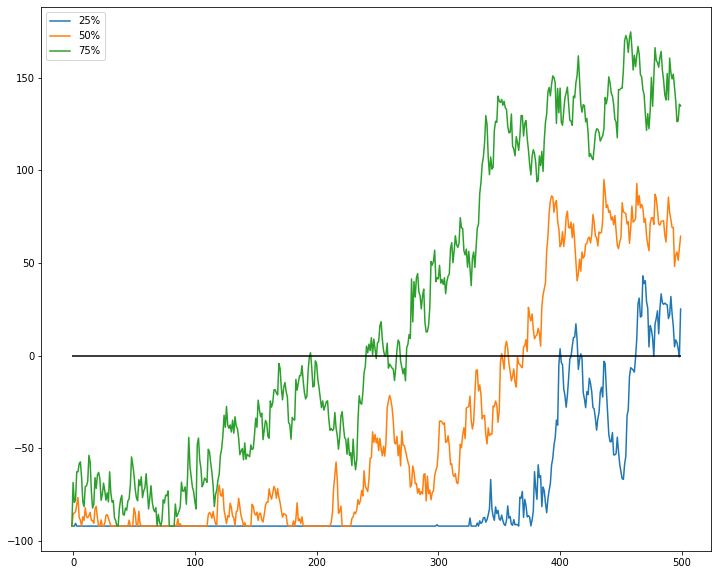

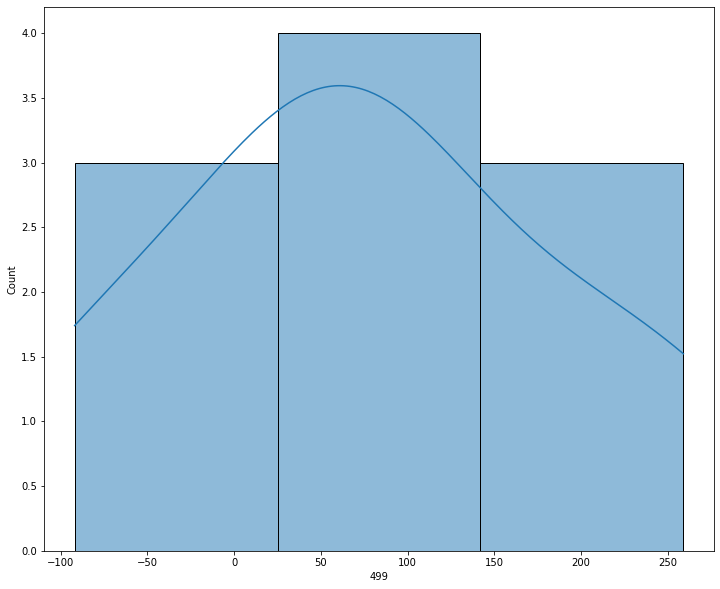

In [10]:
cv.results.to_csv("results.csv")

In [8]:
cv.results.sort_values("utility", ascending=False)

,utility,is_valid,is_valid_posteriori
longputdown and out0.7longputvanilla0.9,327.691001,True,True
longputup and in0.7longputup and out1.1,305.258996,True,True
longputup and out1.0longputvanilla1.0,270.008841,False,True
longputdown and out0.8longputup and in0.7,267.715127,True,True
longputvanilla0.9longputvanilla1.2,256.176011,True,True
...,...,...,...
shortputdown and in0.9shortputvanilla0.9,-235.993777,True,True
shortputdown and in1.2shortputvanilla0.8,-260.574552,True,True
shortputdown and in1.3shortputvanilla0.8,-269.696549,True,True
shortputup and out1.3shortputvanilla1.3,-288.119817,True,True
